<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/California_Housing_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Regresión: predecir el precio de casas en la ciuidad de california

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns; sns.set()
from tensorflow import keras
from sklearn.linear_model import LinearRegression

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')

In [ ]:
X.shape

(20640, 8)

In [ ]:
X.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15034,5.4333,29.0,7.233766,1.058442,385.0,2.500000,32.78,-116.99
16040,3.5156,42.0,4.794621,1.044010,1211.0,2.960880,37.71,-122.47
12349,3.6667,15.0,14.304762,2.928571,437.0,2.080952,33.80,-116.48
3899,4.5648,36.0,4.864469,1.051282,823.0,3.014652,34.21,-118.52


In [ ]:
print(housing.DESCR)            #el dataset proporcionaba esta info

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

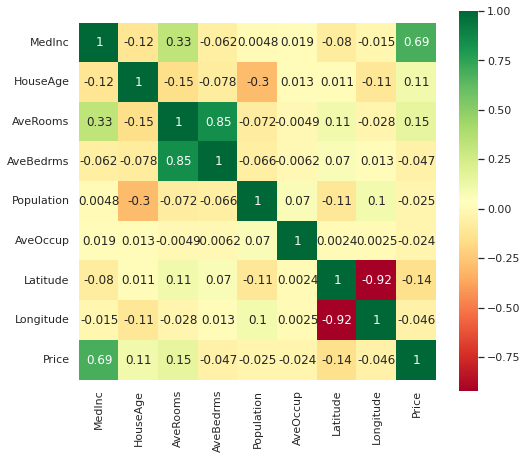

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(X.join(y).corr(), square=True, annot=True, cmap='RdYlGn')           #relación de datos

In [ ]:
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19622,4.0000,36.0,6.000000,1.500000,27.0,3.375000,37.33,-121.29
6351,5.4110,33.0,5.890909,1.029091,868.0,3.156364,34.14,-117.94
954,5.1406,46.0,6.153846,1.004808,512.0,2.461538,37.64,-121.92
12930,5.6529,14.0,6.817822,1.009901,1413.0,2.798020,38.65,-121.21


In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=5, n_hidden=2, input_shape=(8,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))          #crea red neuronal y sus activadores
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='sgd', loss='mean_squared_error')
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=30, verbose=1, validation_split=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(20,40),
    'ann__batch_size':[10,15,20,25]
}

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, n_jobs=-1, cv=3)

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

In [ ]:
grid_result.best_params_

{'ann__batch_size': 15, 'ann__n_hidden': 0, 'ann__n_neurons': 25}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params               #mejor resultado de parámetros

{'batch_size': 15, 'n_hidden': 0, 'n_neurons': 25}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=20 , verbose=0, **sk_params)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train, y_train);
y_fit = model.predict(X_test);
print(mean_squared_error(y_test,y_fit))             #errores y presiión
r2_score(y_test, y_fit )

0.41519713800544256


0.6848826888780939

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('linear_model', LinearRegression())
])

In [ ]:
model.fit(X_train,y_train)
y_fit =  model.predict(X_test)
print(mean_squared_error(y_test,y_fit))           #resultado final
r2_score(y_test,y_fit)

0.514489372764415


0.6095240238765969